### Establishing a surface plot function. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


def surface_plot(x,y,z,z_min = 0,z_max = 1.1 ,
                 title  = 'title', z_label = 'z_label' ,filename = 'filename' ,save = None):

    xplt , yplt = np.meshgrid(x,y)
    zplt = np.reshape(z, xplt.shape, order = 'C')

    fig1 = plt.figure()
    ax = fig1.gca(projection='3d')
    surf = ax.plot_surface(xplt, yplt, zplt, cmap=cm.coolwarm, linewidth=10, antialiased=True)
    ax.set_zlim(z_min,z_max)
    ax.zaxis.set_major_locator(LinearLocator(6))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.01e'))
    fig1.colorbar(surf, shrink=0.5, aspect=15)
    ax.set_zlabel(z_label)
    plt.title(title)
    plt.ylabel('y')
    plt.xlabel('x')

    if save == True:
        plt.savefig(filename)
    elif save == 'show':
         plt.show()

### Initial Matrix 50x50

(51, 51)


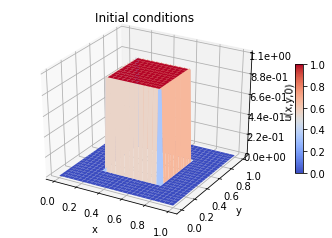

In [2]:
initial = np.loadtxt('initial_matrix.dat') 
print(initial.shape)
x = np.linspace(0,1,51)
surface_plot(x,x,initial,z_min = 0,z_max = 1.1 ,
                 title  = 'Initial conditions' ,
                 z_label = 'u(x,y,0)',
                 filename = 'Initial_50x50' ,
                 save = True)



# N = 10 steps. 
## The analytical solution

dx =  0.1
dt =  0.0020000000000000005
t = 0.020000000000000004


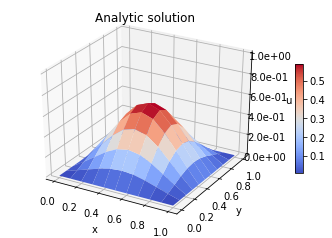

In [3]:
A_10 = np.loadtxt('2d-analytical_tsteps10_dt0,2_5000_10x10.dat')
x = np.linspace(0,1,11)
surface_plot(x,x,A_10,z_min = 0,z_max = 1 ,
                 title  = 'Analytic solution' ,
                 z_label = 'u',
                 filename = 'analytical_10' ,
                 save = True)

dx = x[1]-x[0]
print('dx = ', dx)

dt = 0.2*dx**2
print('dt = ', dt)

t = dt*10

print('t =', t )

## The numerical solution


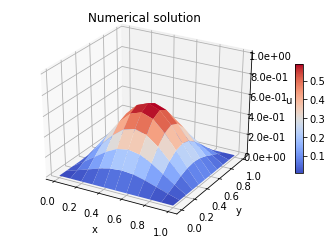

In [4]:
N_10 = np.loadtxt('2d-numerical_tsteps10_dt0,2.dat')
x = np.linspace(0,1,11)
surface_plot(x,x,N_10,z_min = 0,z_max = 1 ,
                 title  = 'Numerical solution',
                 z_label = 'u',
                 filename = 'numerical_10',
                 save = True)

## The Error analysis
### Absolute difference

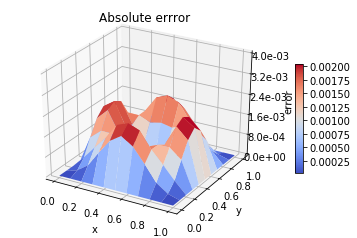

In [5]:
E_10 = np.abs(N_10-A_10)
surface_plot(x,x,E_10,z_min = 0,z_max = 0.004 ,
                 title  = 'Absolute errror', 
                 z_label = 'error',
                 filename = 'abs_error_10' ,
                 save = True)

### Relativ error:
    

/Users/phb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


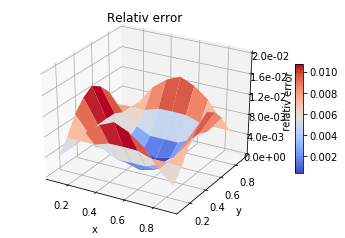

In [6]:
rE_10 = E_10/A_10

surface_plot(x[1:-1],x[1:-1],rE_10[1:-1,1:-1],z_min = 0,z_max = 0.02 ,
                 title  = 'Relativ error',
                 z_label = 'relativ error'
                 ,filename = 'rel_error_10' ,
                 save = True)

In [7]:
print('Max error:' ,  np.max(E_10))
print('Max relativ error; ', np.max(rE_10[1:-1,1:-1]))

Max error: 0.0022604369170622918
Max relativ error;  0.013311832470293591


## N = 100

In [8]:
# time:
dt = 0.2*dx**2
print('dt = ', dt)

t = dt*100

print('t =', t )

dt =  0.0020000000000000005
t = 0.20000000000000004


### Analytical solution:
    

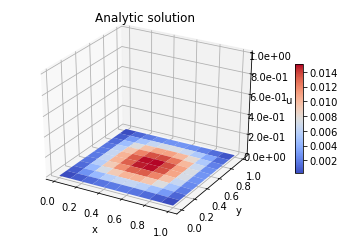

In [9]:
A_100 = np.loadtxt('2d-analytical_tsteps100_dt0,2_500.dat')
x = np.linspace(0,1,11)

surface_plot(x,x,A_100,z_min = 0,z_max = 1 ,
                 title  = 'Analytic solution' ,
                 z_label = 'u',
                 filename = 'analytical_100' ,
                 save = True)



### Numerical solution

0.01505595183869895


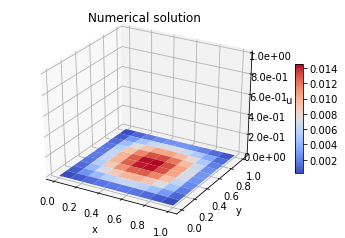

In [10]:
N_100 = np.loadtxt('2d-numerical_tsteps100_dt0,2.dat')
x = np.linspace(0,1,11)
surface_plot(x,x,N_100,z_min = 0,z_max = 1 ,
                 title  = 'Numerical solution',
                 z_label = 'u',
                 filename = 'numerical_100',
                 save = True)

print(np.max(N_100))

### Error Analysis

/Users/phb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Max error: 0.000585043613894708
Max relativ error;  0.013311832470293591


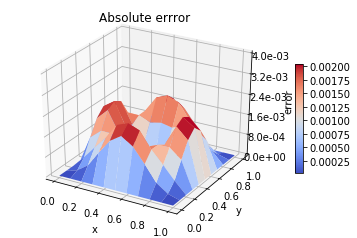

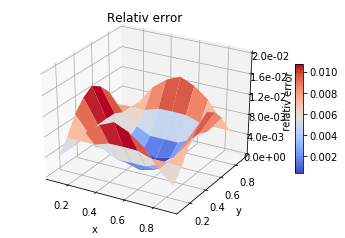

In [11]:
# Absolute error
E_100 = np.abs(N_100-A_100)
surface_plot(x,x,E_10,z_min = 0, z_max = 0.004 ,
                 title  = 'Absolute errror', 
                 z_label = 'error',
                 filename = 'abs_error_100' ,
                 save = True)
# Relativ error
rE_100 = E_10/A_10

surface_plot(x[1:-1],x[1:-1],rE_100[1:-1,1:-1],z_min = 0,z_max = 0.02 ,
                 title  = 'Relativ error',
                 z_label = 'relativ error'
                 ,filename = 'rel_error_100' ,
                 save = True)

print('Max error:' ,  np.max(E_100))
print('Max relativ error; ', np.max(rE_100[1:-1,1:-1]))